# Project: Concrete Strength Prediction

#### Import packages

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline

InteractiveShell.ast_node_interactivity = 'all'

#### Set package options

In [41]:
sns.set(color_codes=True)
sns.set_style(style='darkgrid')
palette = 'Set2'
pd.set_option('display.max_columns', None)

#### Import dataset; one for raw data, one to edited/imputed data 

In [3]:
raw_data = pd.read_csv('concrete.csv')
data = pd.read_csv('concrete.csv')

#### Methods for use elsewhere

In [4]:
def dist(col):
    plt.figure(figsize=(25,5))
    sns.distplot(col);
    
def hist(col):
    plt.figure(figsize=(20,10))
    plt.hist(col)
    plt.axvline(col.mean(), color='y', linewidth=2, label='Mean')
    plt.axvline(col.median(), color='g', linewidth=2, label='Median')
    plt.legend();
    
def box(col):
    plt.figure(figsize=(25,5))
    sns.boxplot(col);
    
def print_summary(col):
    dist(col)
    hist(col)
    box(col)
    print(col.describe())
    print('')
    print('Unique values: ' + str(col.nunique()))

## Generic data analysis

In [5]:
raw_data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [6]:
raw_data.shape

(1030, 9)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
raw_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Univariate analysis

### Cement (cement)

count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64

Unique values: 278


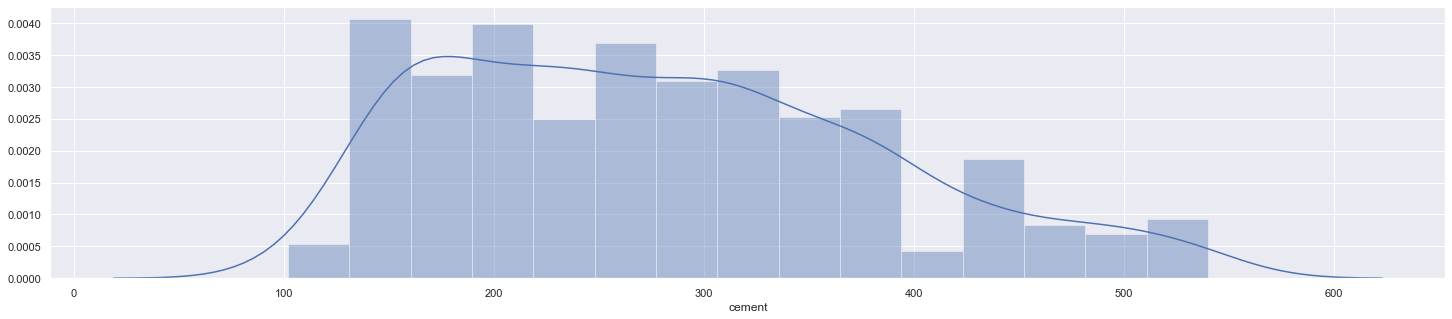

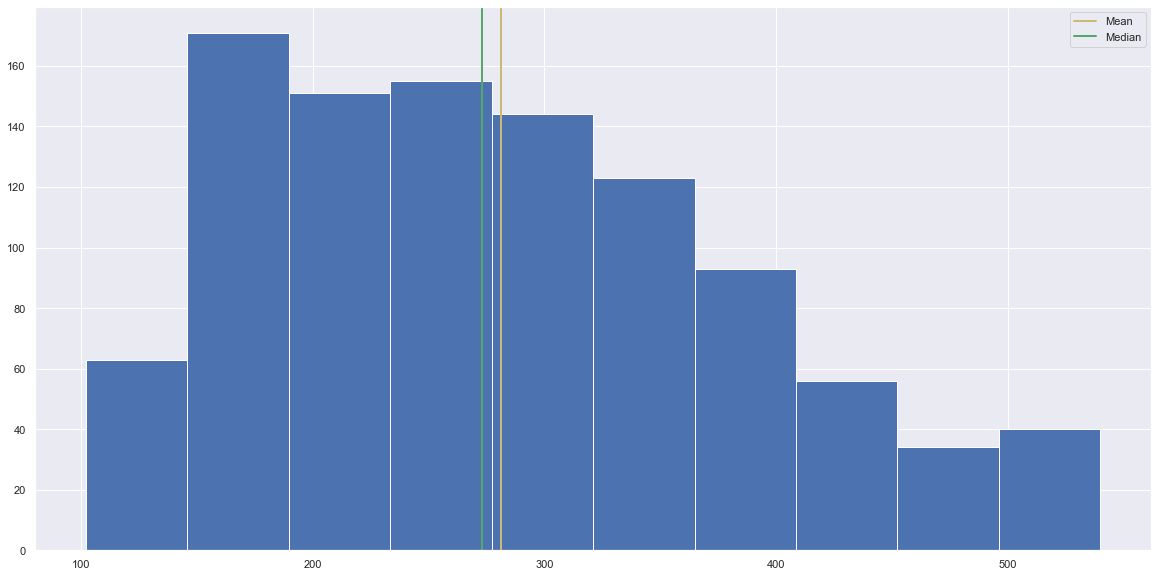

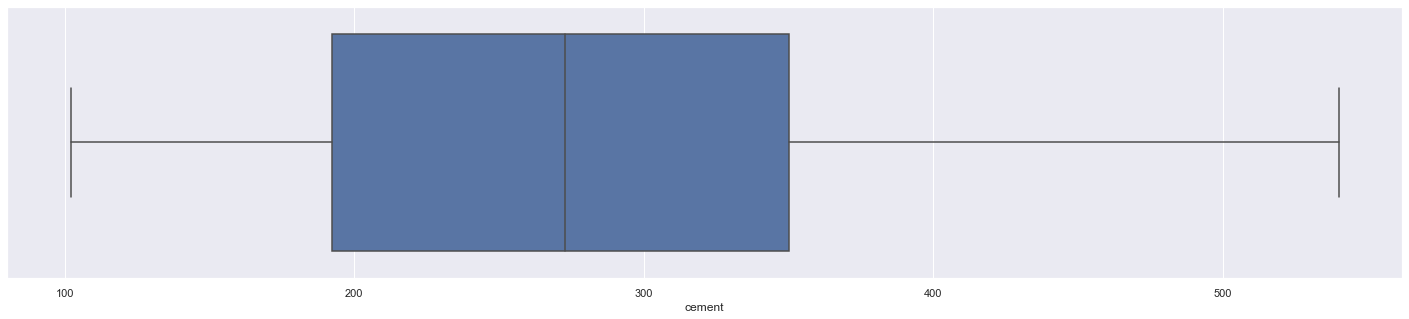

In [9]:
print_summary(raw_data['cement'])

Distribution of `cement` has a very slight right-hand skew.

### Blast Furance Slag (slag)

count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: slag, dtype: float64

Unique values: 185


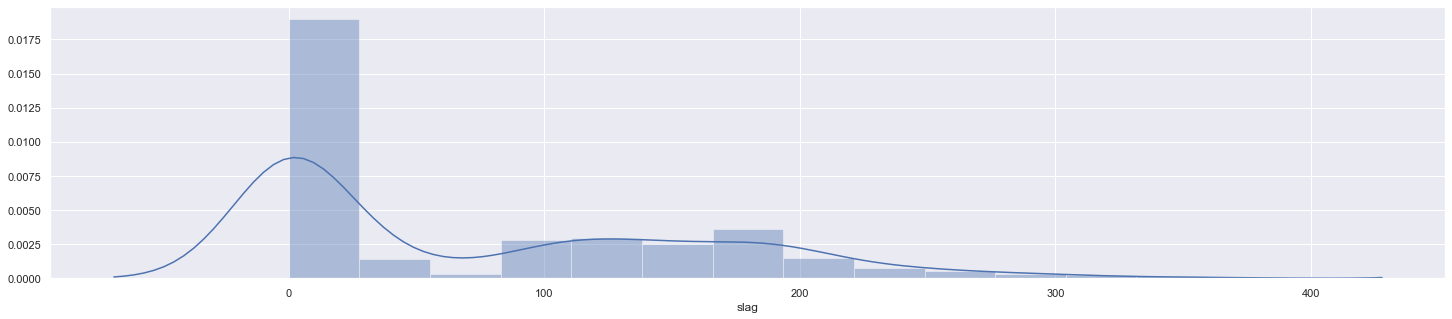

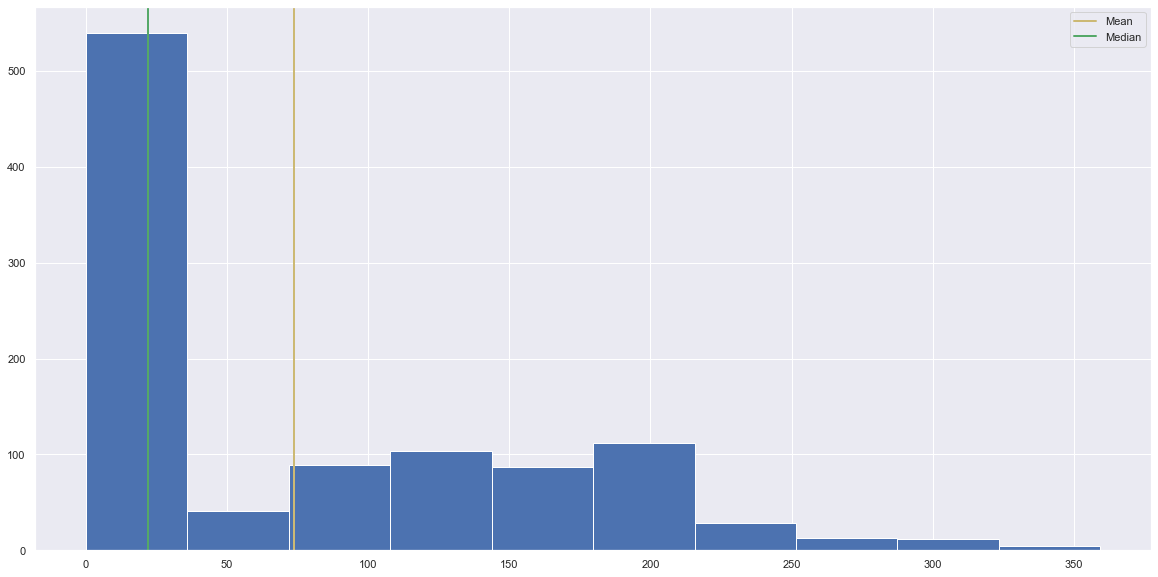

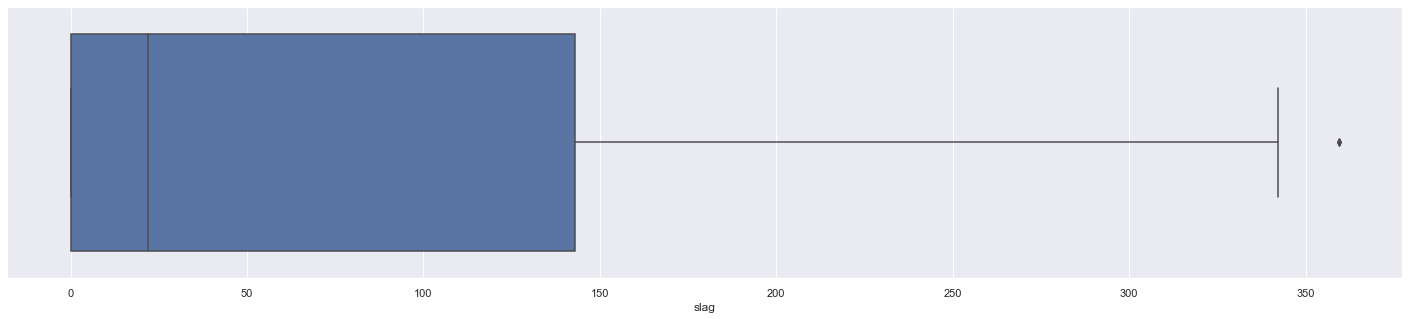

In [10]:
print_summary(raw_data['slag'])

Distribution of `slag` has a very large right hand skew.

### Fly Ash (ash)

count    1030.000000
mean       54.188350
std        63.997004
min         0.000000
25%         0.000000
50%         0.000000
75%       118.300000
max       200.100000
Name: ash, dtype: float64

Unique values: 156


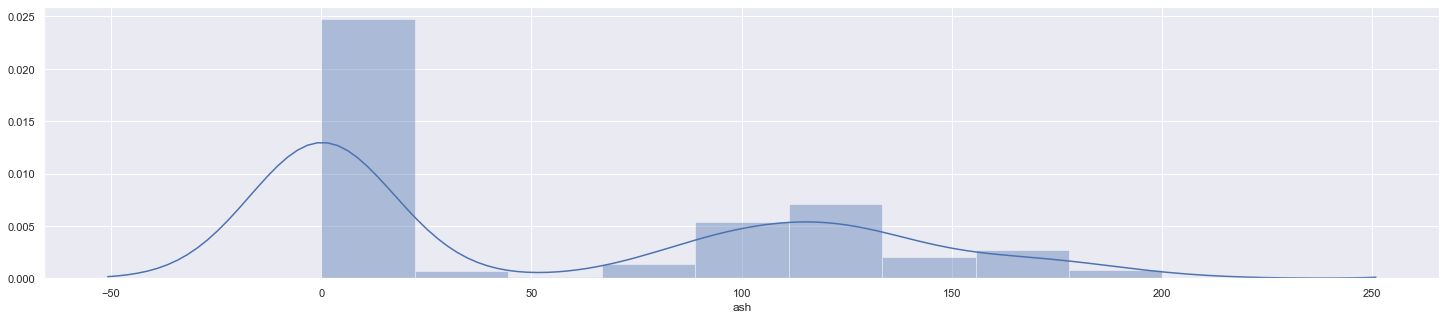

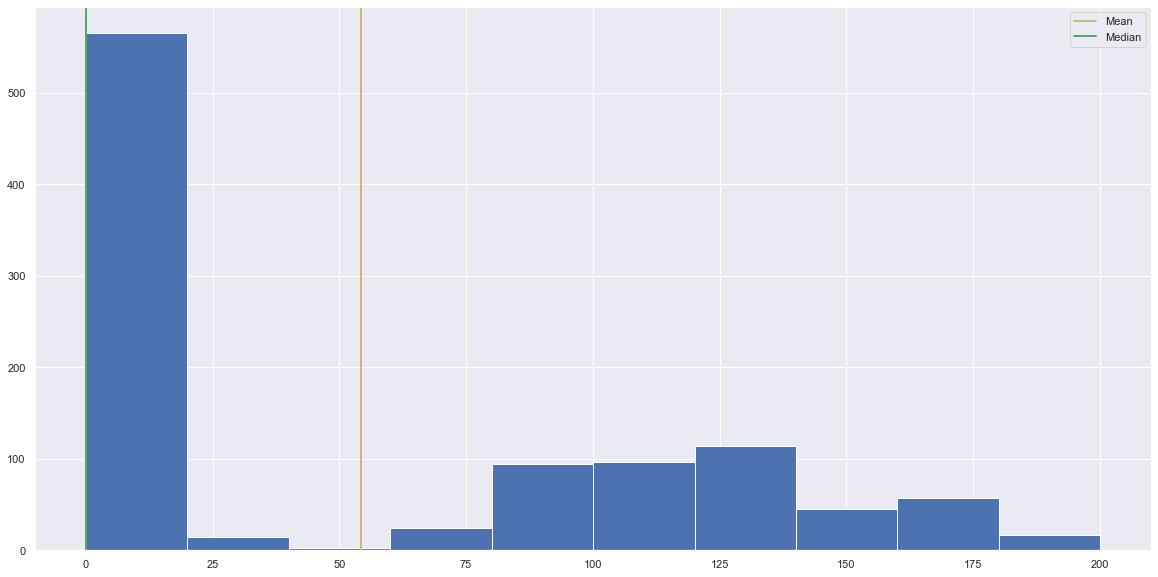

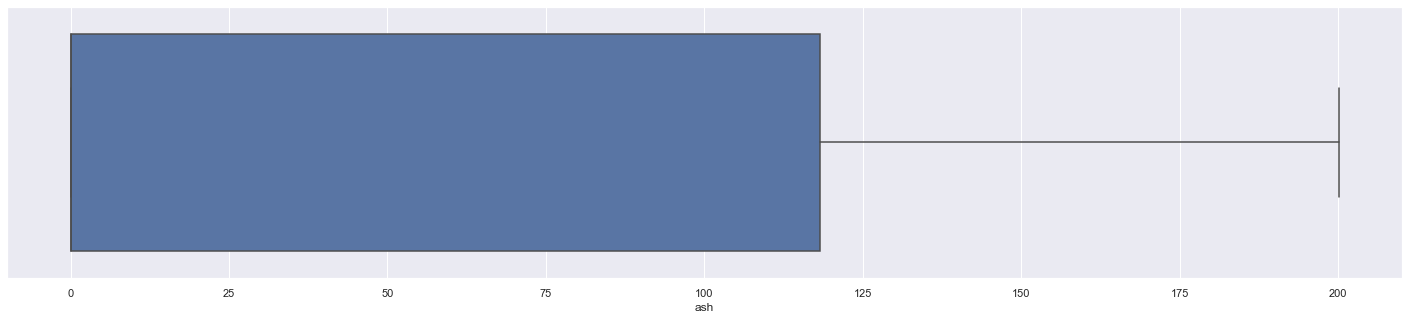

In [11]:
print_summary(raw_data['ash'])

Distribution of `ash` has a very strong right-hand skew, however this is largely due to most samples have no ash content.

***What does it look like if we only look at samples containing some ash?***

count    464.000000
mean     120.288793
std       33.675470
min       24.500000
25%       97.850000
50%      121.400000
75%      141.000000
max      200.100000
Name: ash, dtype: float64

Unique values: 155


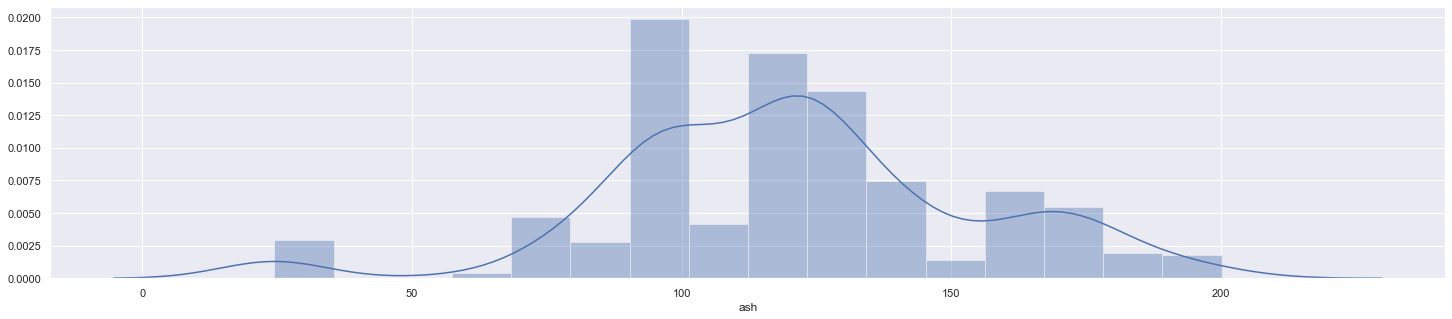

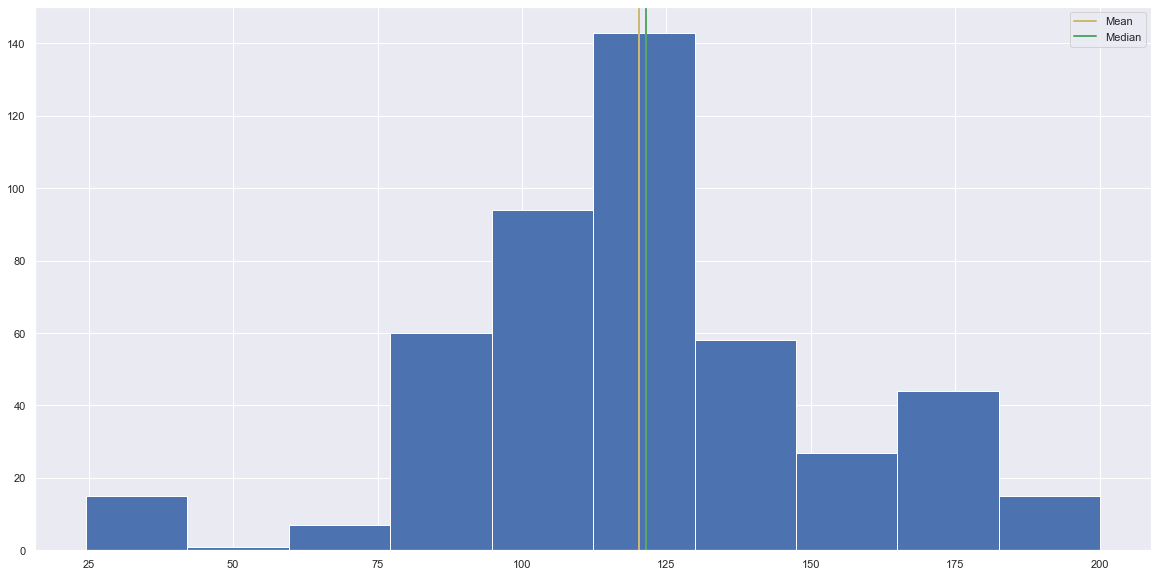

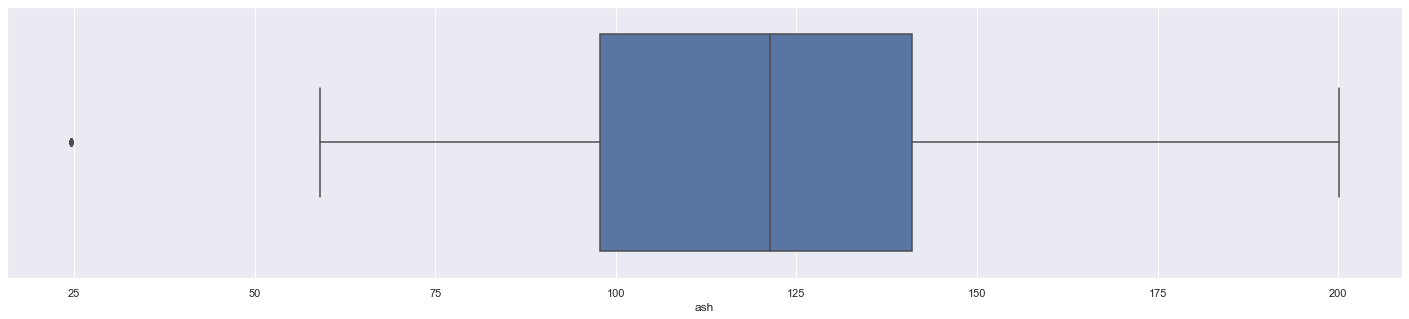

In [12]:
print_summary(raw_data[raw_data['ash'] > 0]['ash'])

If we look at the distribution of `ash` in samples with non-zero levels of `ash`, we see a moderate left-hand skew.

### Water (water)

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

Unique values: 195


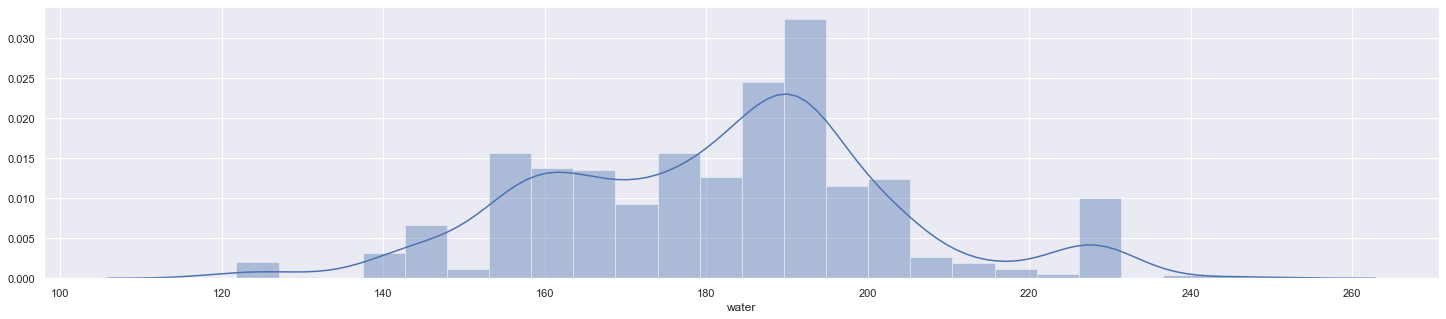

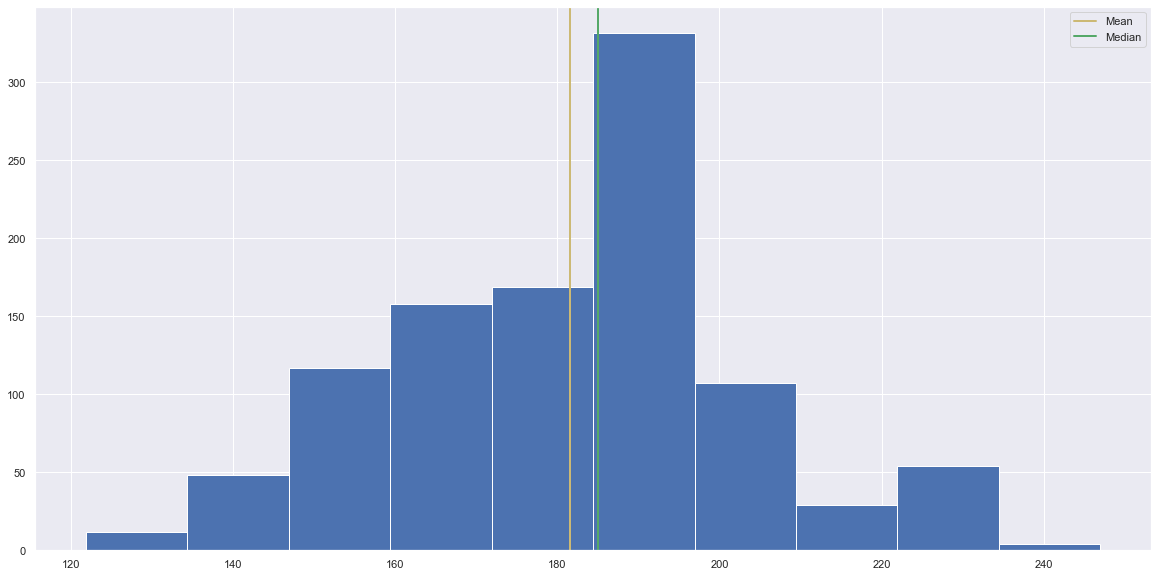

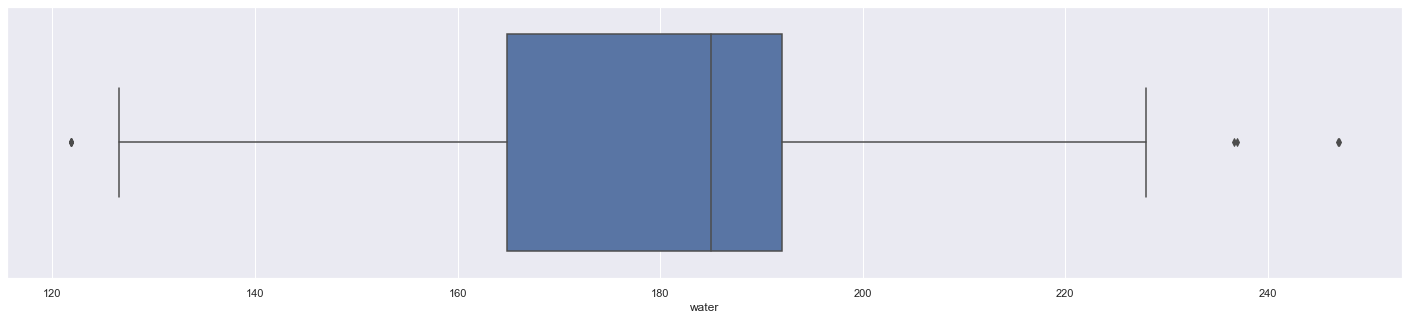

In [13]:
print_summary(raw_data['water'])

Distribution of `water` has a strong left-hand skew but also several large outliers.

### Superplasticizer (superplastic)

count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: superplastic, dtype: float64

Unique values: 111


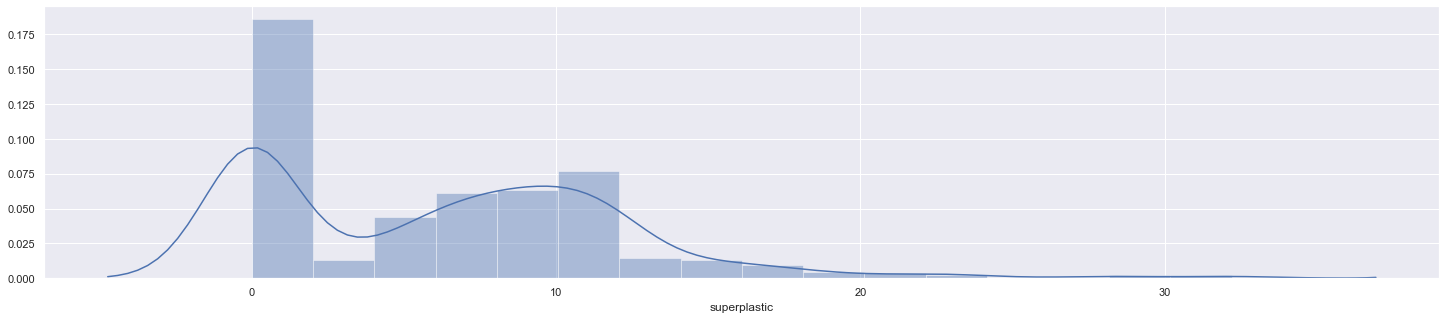

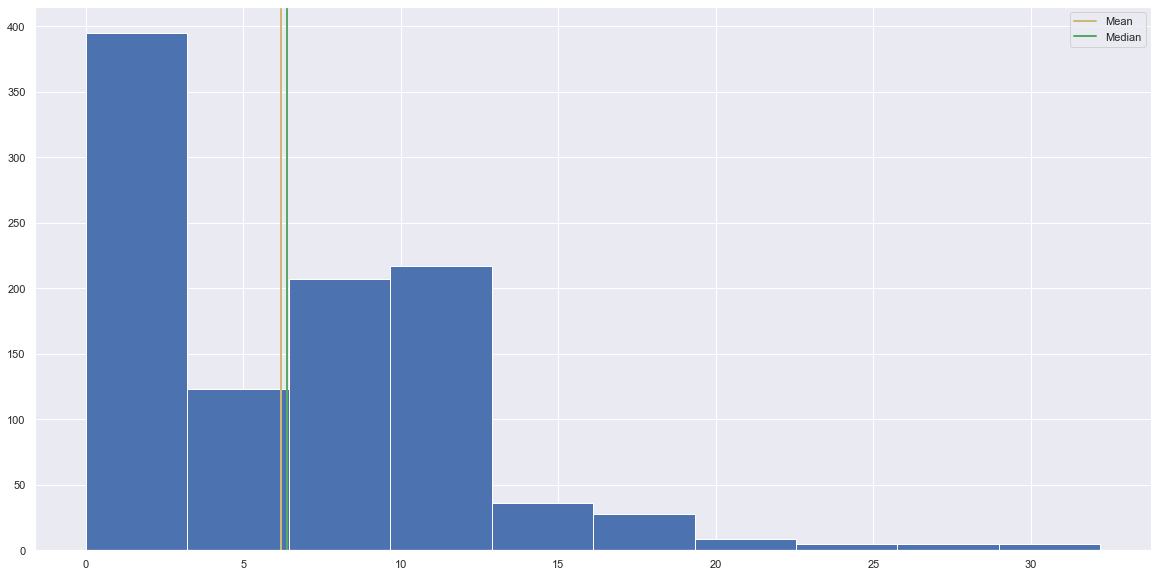

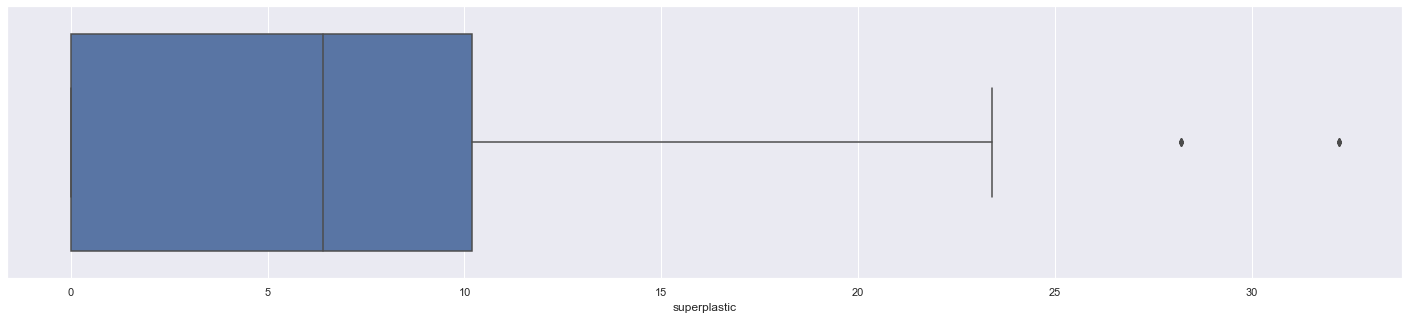

In [14]:
print_summary(raw_data['superplastic'])

Distribution of `superplastic` has a strong right skew with a few large outliers.

### Coarse Aggregate (coarseagg)

count    1030.000000
mean      972.918932
std        77.753954
min       801.000000
25%       932.000000
50%       968.000000
75%      1029.400000
max      1145.000000
Name: coarseagg, dtype: float64

Unique values: 284


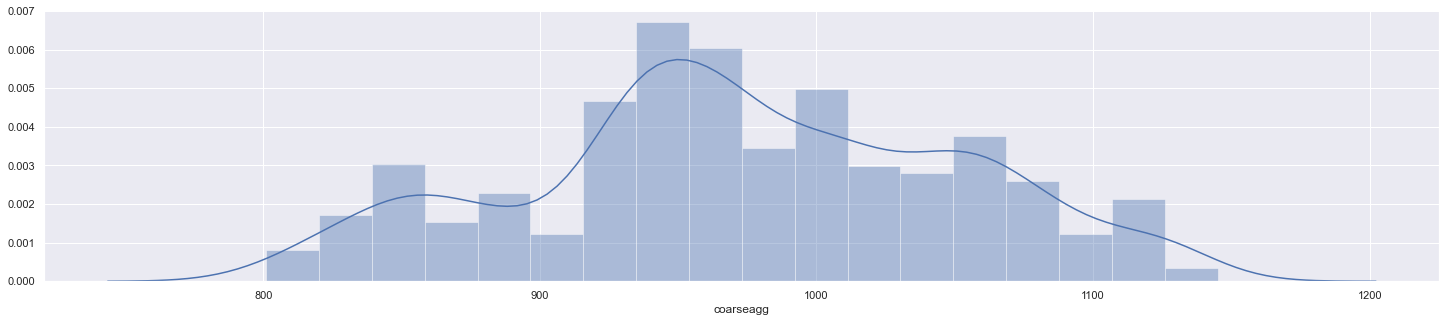

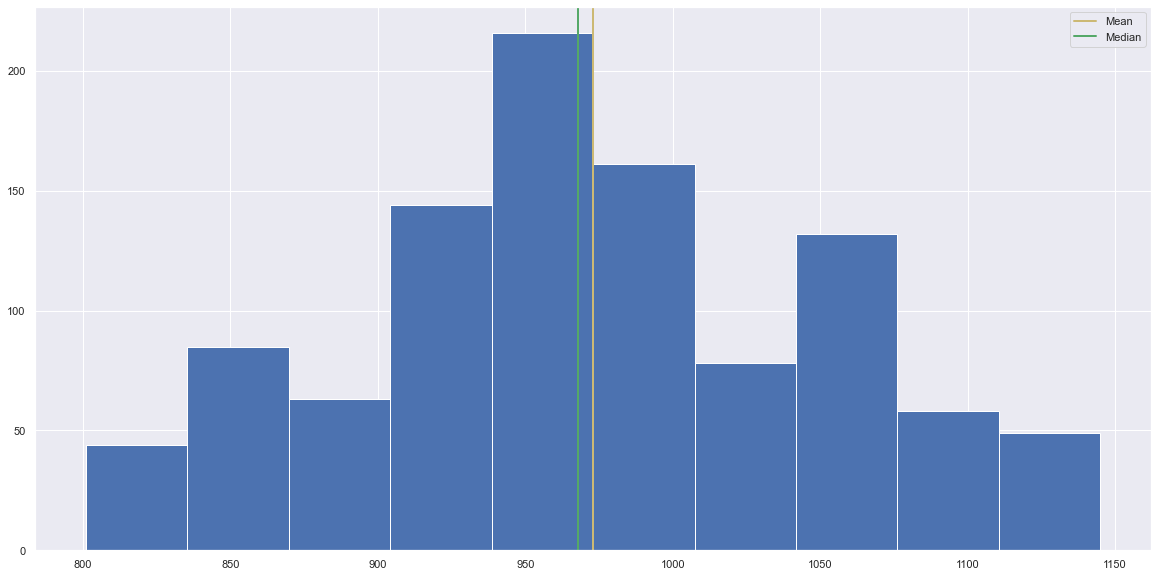

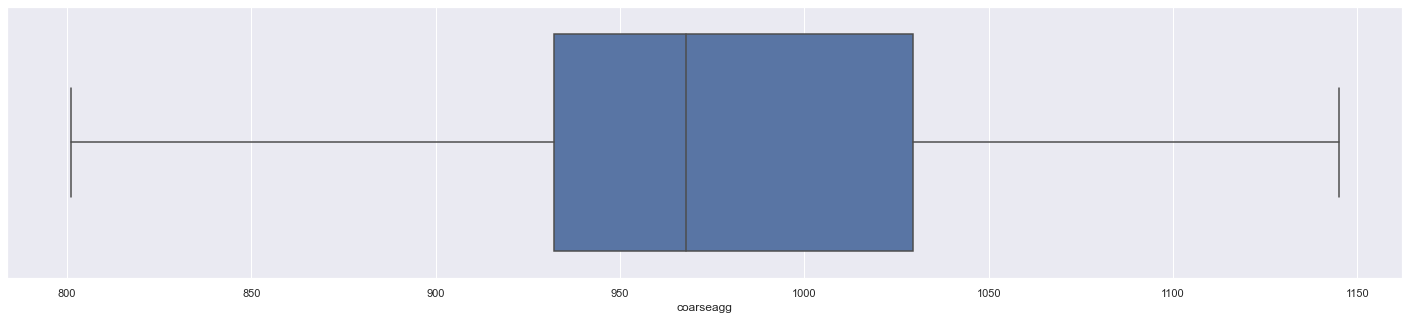

In [15]:
print_summary(raw_data['coarseagg'])

Distribution of `courseagg` has a slight right skew and no outliers.

### Fine Aggregate (fineagg)

count    1030.000000
mean      773.580485
std        80.175980
min       594.000000
25%       730.950000
50%       779.500000
75%       824.000000
max       992.600000
Name: fineagg, dtype: float64

Unique values: 302


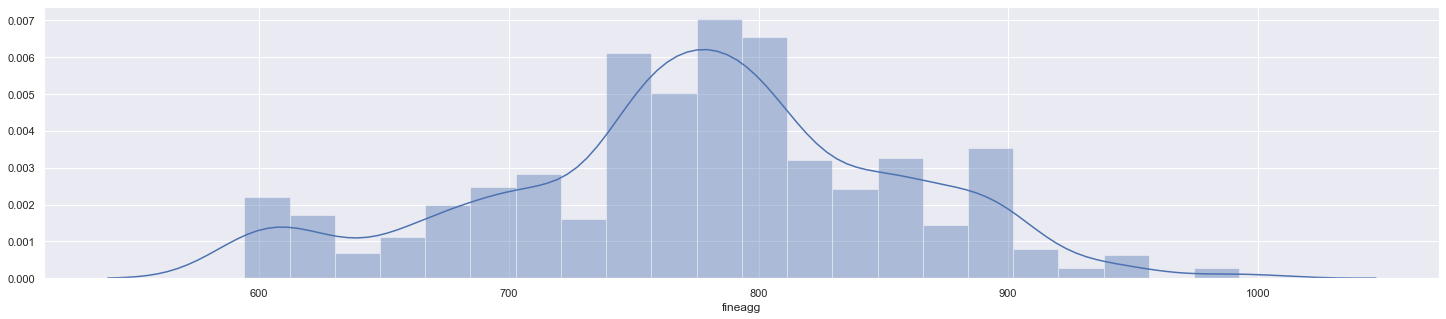

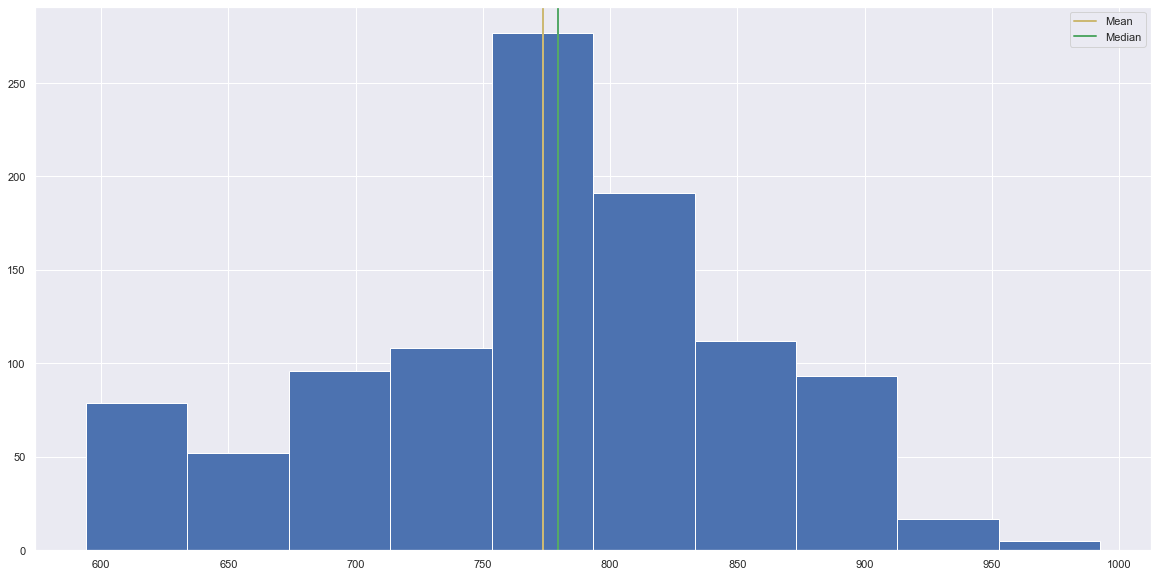

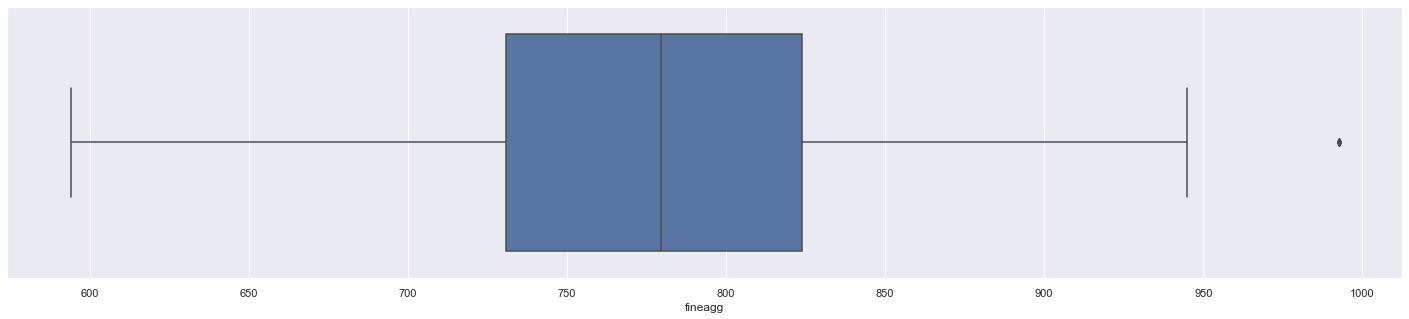

In [16]:
print_summary(raw_data['fineagg'])

Distribution of `fineagg` does not have a noticeable skew.

### Age (age)

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

Unique values: 14


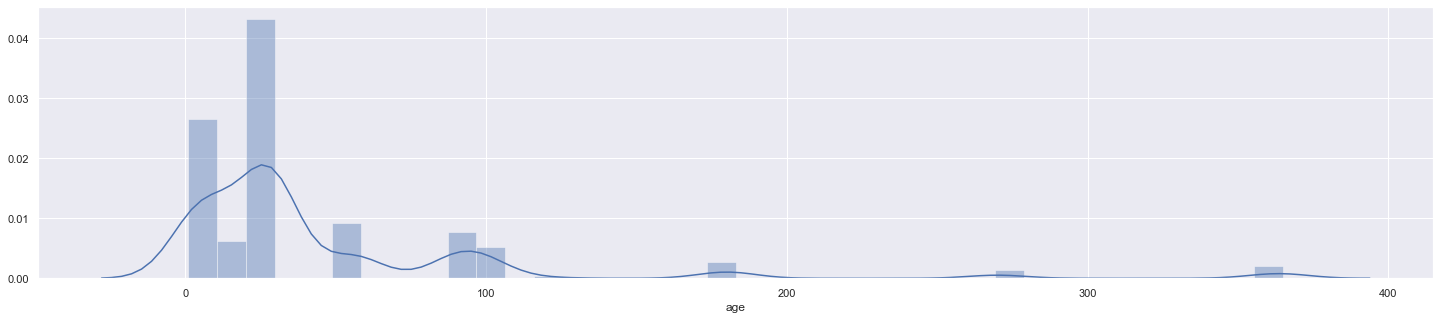

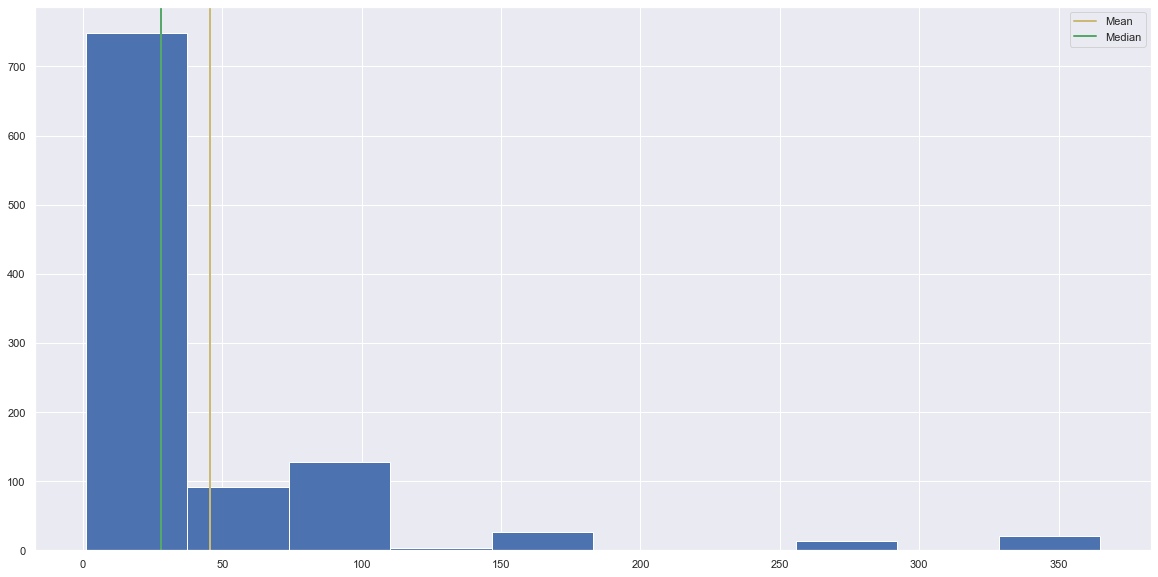

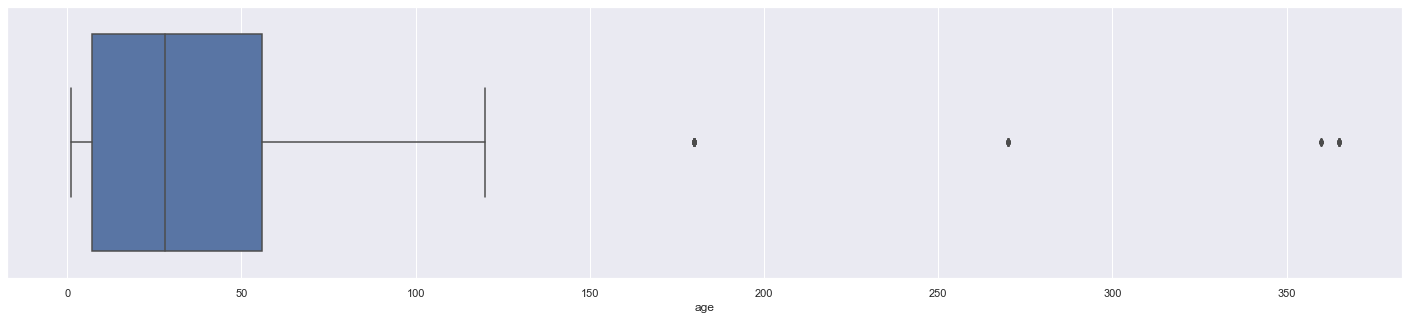

In [17]:
print_summary(raw_data['age'])

Distribution of `age` has a right skew with several large outliers for particularly older samples.

### Compressive Strength (strength)

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

Unique values: 845


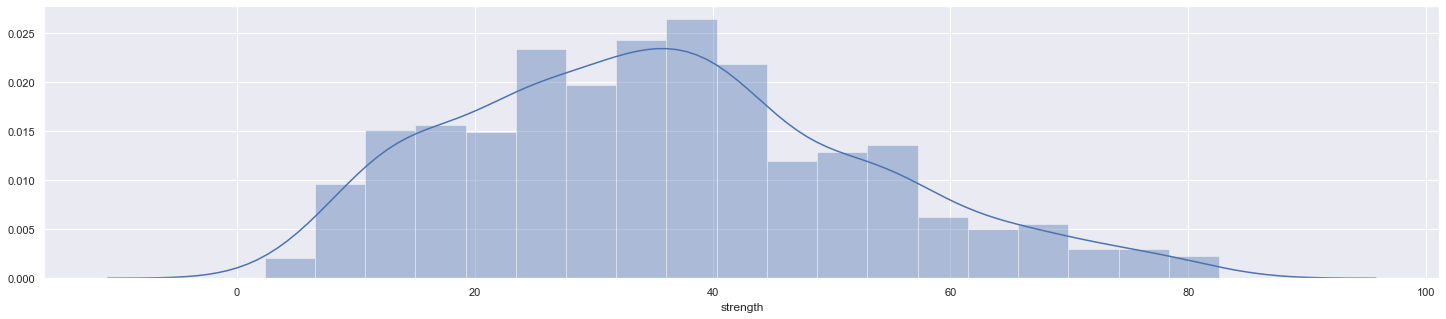

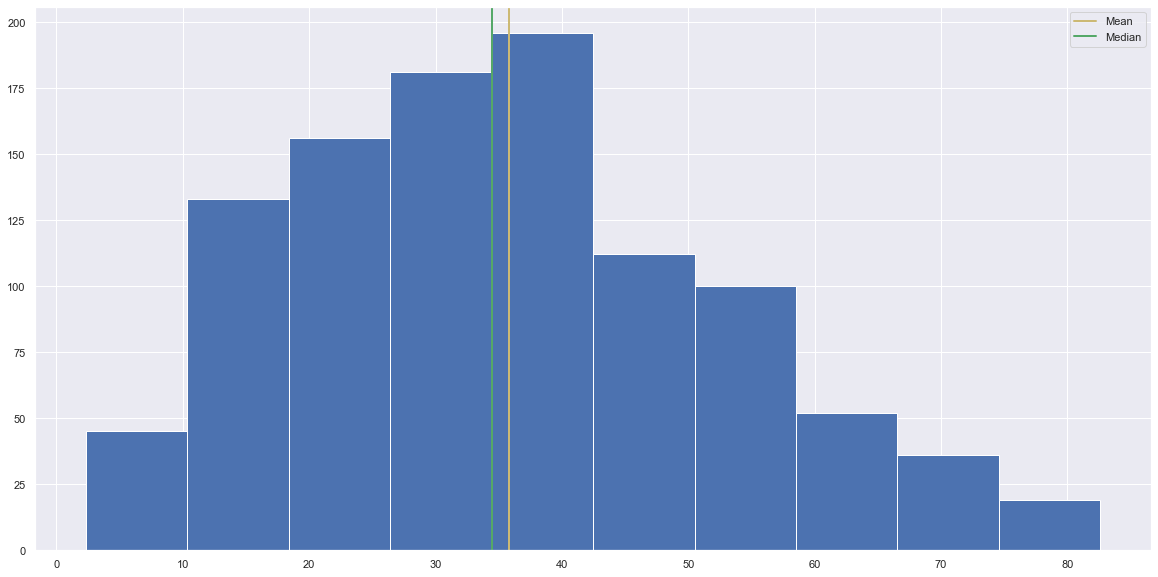

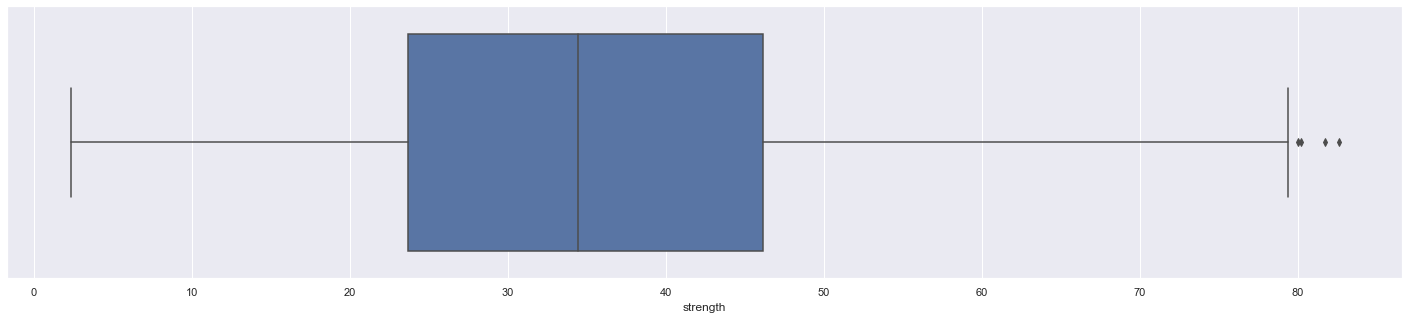

In [18]:
print_summary(raw_data['strength'])

Distribution of `strength` has a slight right skew with a few large outliers.

## Bivariate analyses

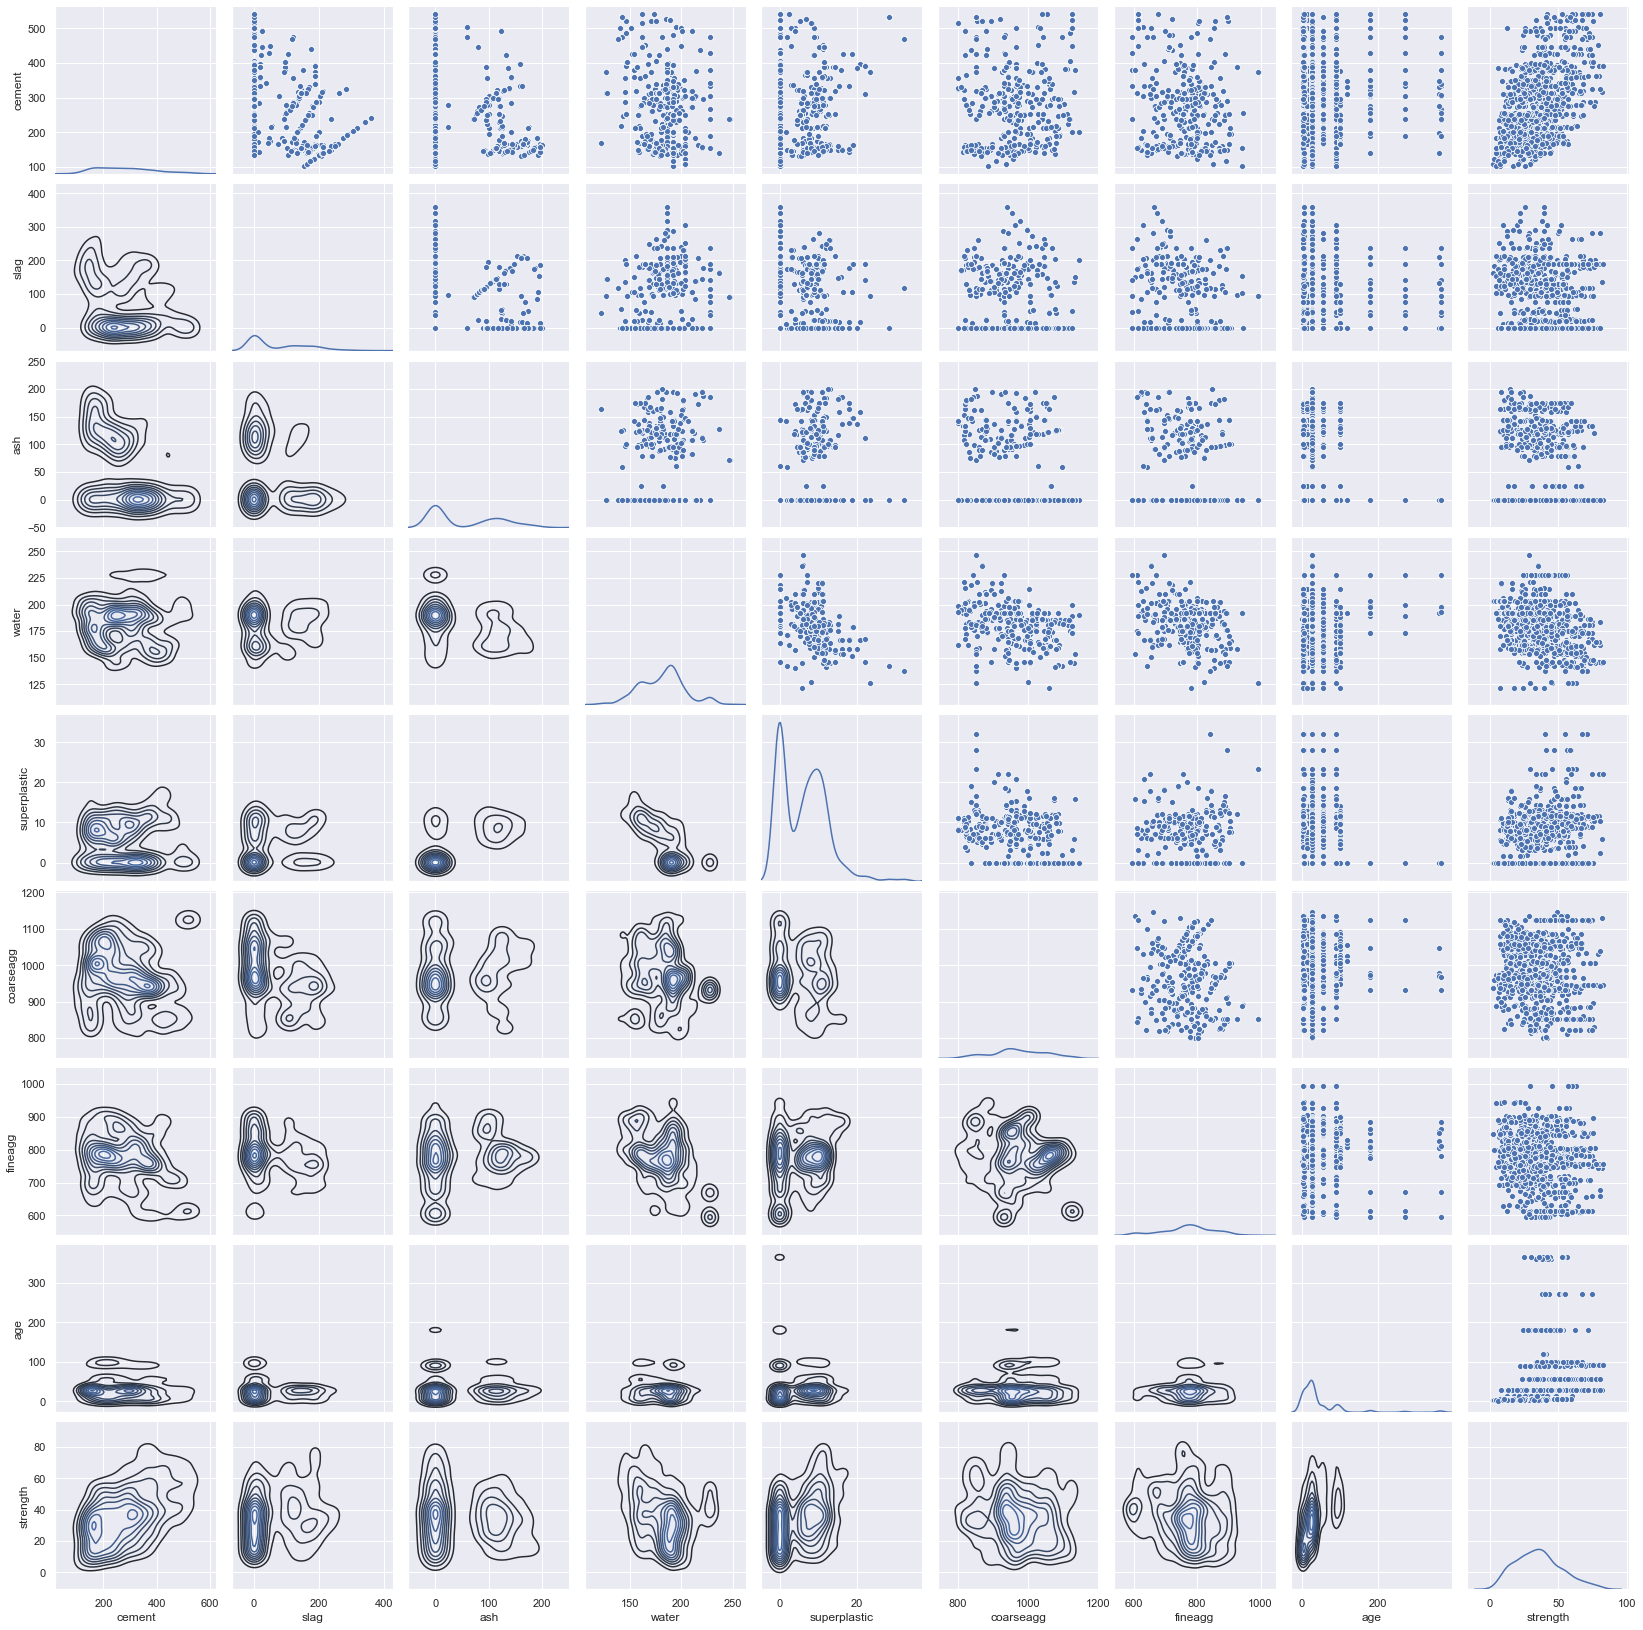

In [34]:
g = sns.PairGrid(raw_data);

g.map_upper(sns.scatterplot);
g.map_diag(sns.kdeplot);
g.map_lower(sns.kdeplot);

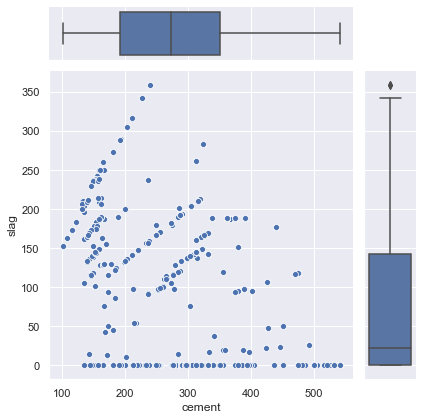

In [46]:
def marginal_boxplot(a, vertical=False, **kws):
    if vertical:
        sns.boxplot(y=a, **kws)
    else:
        sns.boxplot(x=a, **kws)

g = sns.JointGrid(data=raw_data, x='cement', y='slag');
g.plot_joint(sns.scatterplot);
g.plot_marginals(marginal_boxplot);